In [254]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt

In [255]:
#Fetching data from directory( Shuffling and labelling is done )

image_size=(256,256)
batch_size=32

train_data=keras.utils.image_dataset_from_directory(  
   '/Users/krishna/Desktop/Sem_6/CS6910/Assignment_2/train',
   labels="inferred",
   label_mode="int",
   class_names=None,
   color_mode="rgb",
   # batch_size=batch_size,
   image_size=image_size,
   shuffle=True,
)

val_data=keras.utils.image_dataset_from_directory(
   '/Users/krishna/Desktop/Sem_6/CS6910/Assignment_2/valid',
   labels="inferred",
   label_mode="int",
   class_names=None,
   color_mode="rgb",
   # batch_size=batch_size,
   image_size=image_size,
   shuffle=True,
)

test_data=keras.utils.image_dataset_from_directory(
   '/Users/krishna/Desktop/Sem_6/CS6910/Assignment_2/test',
   labels="inferred",
   label_mode="int",
   class_names=None,
   color_mode="rgb",
   # batch_size=batch_size,
   image_size=image_size,
   shuffle=True,
)

Found 2000 files belonging to 5 classes.
Found 500 files belonging to 5 classes.
Found 500 files belonging to 5 classes.


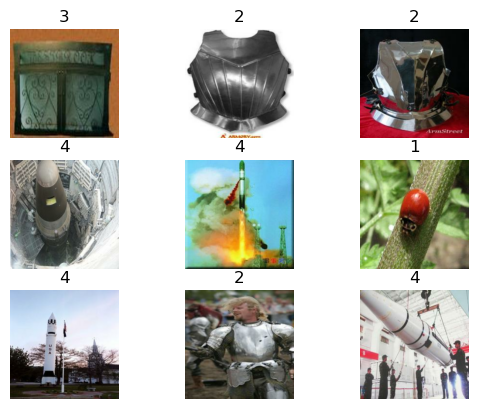

In [256]:
# Plotting data
for images,labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    plt.show()

In [257]:
# Data Augmentation not done
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

cl2_size=8  # Hyperparameter

# Building the model

def image_classifier(input_shape,num_classes,dropout_rate):
   inputs=keras.Input(shape=input_shape)
   x = data_augmentation(inputs)
   x = layers.Rescaling(1./255)(x)
   x=layers.Conv2D(4,3,1,padding='same')(inputs)
   x=layers.AveragePooling2D(2,2)(x)
#    x=layers.Dropout(dropout_rate)(x)
   x=layers.Conv2D(cl2_size,3,1,padding='same')(x)
   x=layers.AveragePooling2D(2,2)(x)
#    x=layers.Dropout(dropout_rate)(x)
   x=layers.Flatten()(x)
   outputs=layers.Dense(num_classes,activation='softmax')(x)
   model=keras.Model(inputs,outputs,name='image_classifier')
   model.summary()
   return model
   
cnn_model=image_classifier(input_shape=(image_size[0],image_size[1],3),num_classes=5,dropout_rate=0.1)
#keras.utils.plot_model(cnn_model,show_shapes=True)

Model: "image_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_79 (Conv2D)          (None, 256, 256, 4)       112       
                                                                 
 average_pooling2d_79 (Aver  (None, 128, 128, 4)       0         
 agePooling2D)                                                   
                                                                 
 conv2d_80 (Conv2D)          (None, 128, 128, 8)       296       
                                                                 
 average_pooling2d_80 (Aver  (None, 64, 64, 8)         0         
 agePooling2D)                                                   
                                                                 
 flatten_35 (Flatten)        (None, 32768)        

In [258]:
# Model Training on Training data

max_epochs=100
min_loss=1e-6

cnn_model.compile(optimizer="adam",
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
#Check no of steps per execution

threshold_callback=keras.callbacks.EarlyStopping(monitor='loss',
                                       min_delta=min_loss,
                                       verbose=1,
                                       mode='min',
                                       restore_best_weights=True)

cnn_model.fit(train_data,
              epochs=max_epochs,
              verbose=1,
              callbacks=[threshold_callback])

Epoch 1/100
63/63 [==============================] - 15s 226ms/step - loss: 481.6460 - accuracy: 0.3575
Epoch 2/100
63/63 [==============================] - 14s 217ms/step - loss: 25.8589 - accuracy: 0.5190
Epoch 3/100
63/63 [==============================] - 14s 215ms/step - loss: 11.5777 - accuracy: 0.6050
Epoch 4/100
63/63 [==============================] - 14s 217ms/step - loss: 8.0928 - accuracy: 0.6995
Epoch 5/100
63/63 [==============================] - 14s 216ms/step - loss: 5.6110 - accuracy: 0.7525
Epoch 6/100
63/63 [==============================] - 14s 217ms/step - loss: 3.4367 - accuracy: 0.8080
Epoch 7/100
63/63 [==============================] - 14s 217ms/step - loss: 2.4637 - accuracy: 0.8390
Epoch 8/100
63/63 [==============================] - 14s 218ms/step - loss: 1.7655 - accuracy: 0.8785
Epoch 9/100
63/63 [==============================] - 14s 218ms/step - loss: 1.6112 - accuracy: 0.8850
Epoch 10/100
63/63 [==============================] - 14s 221ms/step - loss: 1

In [259]:
train_result=cnn_model.evaluate(train_data,
                  batch_size=batch_size,
                  verbose=1)

valid_result=cnn_model.evaluate(val_data,
                  batch_size=batch_size,
                  verbose=1)

test_result= cnn_model.evaluate(test_data,
                  batch_size=batch_size,
                  verbose=1)


16/16 [==============================] - 2s 89ms/step - loss: 19.0171 - accuracy: 0.4160
